# Comparative Analysis
In this notebook, we compare ADWIN with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
deltas = [0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
methods = list()

for d in deltas:
    candidate_name = f"{d}-delta"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/adwin_delta/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,0.002-delta,0.004-delta,0.006-delta,0.008-delta,0.01-delta,0.02-delta,0.04-delta,0.06-delta,0.08-delta,0.1-delta,0.2-delta,0.4-delta,0.6-delta,0.8-delta,1-delta
0,DodgerLoopDay,0.056,0.056,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.037,0.037,0.037
1,EEGRat,0.616,0.632,0.568,0.616,0.616,0.632,0.472,0.520,0.520,0.344,0.520,0.520,0.520,0.536,0.520
2,EEGRat2,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.489,0.482
3,FaceFour,0.406,0.371,0.370,0.378,0.539,0.511,0.382,0.452,0.436,0.350,0.260,0.282,0.410,0.255,0.345
4,GrandMalSeizures2,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508
5,GreatBarbet1,0.610,0.557,0.429,0.433,0.438,0.465,0.483,0.482,0.518,0.560,0.388,0.289,0.334,0.337,0.279
6,Herring,0.962,0.962,0.699,0.904,0.904,0.904,0.962,0.910,0.904,0.904,0.167,0.026,0.026,0.019,0.019
7,InlineSkate,0.252,0.332,0.327,0.195,0.243,0.170,0.166,0.113,0.096,0.119,0.080,0.086,0.073,0.073,0.060
8,InsectEPG1,0.416,0.331,0.433,0.440,0.439,0.414,0.371,0.397,0.412,0.397,0.371,0.324,0.328,0.311,0.316
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4176/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


0.002-delta    0.395
0.004-delta    0.400
0.006-delta    0.409
0.008-delta    0.404
0.01-delta     0.415
0.02-delta     0.408
0.04-delta     0.386
0.06-delta     0.380
0.08-delta     0.379
0.1-delta      0.369
0.2-delta      0.297
0.4-delta      0.286
0.6-delta      0.278
0.8-delta      0.274
1-delta        0.273
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4176/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


0.002-delta    0.232
0.004-delta    0.226
0.006-delta    0.218
0.008-delta    0.234
0.01-delta     0.233
0.02-delta     0.244
0.04-delta     0.237
0.06-delta     0.244
0.08-delta     0.245
0.1-delta      0.243
0.2-delta      0.209
0.4-delta      0.220
0.6-delta      0.203
0.8-delta      0.221
1-delta        0.221
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

0.002-delta:wins=10 rank=3.80952
0.004-delta:wins=10 rank=4.14286
0.006-delta:wins=8 rank=3.66667
0.008-delta:wins=9 rank=3.47619
0.01-delta:wins=10 rank=3.0
0.02-delta:wins=8 rank=3.33333
0.04-delta:wins=8 rank=4.52381
0.06-delta:wins=8 rank=4.33333
0.08-delta:wins=8 rank=4.33333
0.1-delta:wins=8 rank=4.80952
0.2-delta:wins=6 rank=7.19048
0.4-delta:wins=6 rank=7.14286
0.6-delta:wins=5 rank=8.09524
0.8-delta:wins=7 rank=8.61905
1-delta:wins=7 rank=8.80952


Let's plot and output the ranks.

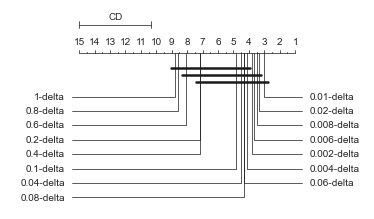

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5,
                                      filename="../../figures/cd_ablation_adwin_delta.pdf")

Let's compute pairwise wins/losses.

In [10]:
selection = "0.01-delta"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

0.01-delta vs 0.002-delta: (wins/ties/losses): 7/8/6
0.01-delta vs 0.004-delta: (wins/ties/losses): 7/7/7
0.01-delta vs 0.006-delta: (wins/ties/losses): 7/11/3
0.01-delta vs 0.008-delta: (wins/ties/losses): 4/16/1
0.01-delta vs 0.02-delta: (wins/ties/losses): 5/12/4
0.01-delta vs 0.04-delta: (wins/ties/losses): 8/11/2
0.01-delta vs 0.06-delta: (wins/ties/losses): 7/10/4
0.01-delta vs 0.08-delta: (wins/ties/losses): 7/11/3
0.01-delta vs 0.1-delta: (wins/ties/losses): 7/11/3
0.01-delta vs 0.2-delta: (wins/ties/losses): 11/9/1
0.01-delta vs 0.4-delta: (wins/ties/losses): 11/8/2
0.01-delta vs 0.6-delta: (wins/ties/losses): 13/6/2
0.01-delta vs 0.8-delta: (wins/ties/losses): 13/6/2
0.01-delta vs 1-delta: (wins/ties/losses): 13/6/2


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4176/2797409782.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4176/2797409782.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


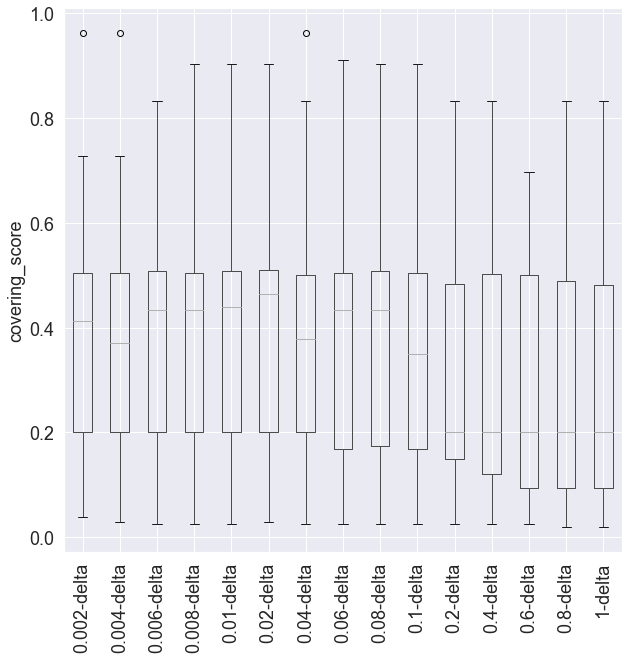

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig("../../figures/bp_ablation_adwin_delta.pdf", bbox_inches="tight") 